In [3]:
%matplotlib inline

In [4]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats 
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')



# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv('data/mouse_drug_data.csv')
clinical_data = pd.read_csv('data/clinicaltrial_data.csv')
clinical_data.head()

# Combine the data into a single dataset
mouse_clinical_df= pd.merge(mouse_data, clinical_data, on="Mouse ID")
# Display the data table for preview
mouse_clinical_df



,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
...,...,...,...,...,...
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1


## Tumor Response to Treatment

In [5]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
tumor_vol_mean = mouse_clinical_df.groupby(['Drug', 'Timepoint']).mean()
tumor_vol_mean.reset_index(level = None, inplace = True)
tumor_vol_mean.drop(['Metastatic Sites'], axis=1,inplace=True)

# Convert to DataFrame

#Preview DataFrame
tumor_vol_mean.head(20)




,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [6]:
tumor_vol_mean.columns

Index(['Drug', 'Timepoint', 'Tumor Volume (mm3)'], dtype='object')

In [7]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_vol_sem = mouse_clinical_df.groupby(['Drug', 'Timepoint']).sem()
tumor_vol_sem.reset_index(level = None, inplace = True)
tumor_vol_sem.drop(['Metastatic Sites', 'Mouse ID'], axis=1,inplace=True)
# Convert to DataFrame

# Preview DataFrame

tumor_vol_sem.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [8]:
# Minor Data Munging to Re-Format the Data Frames
pivot_table = tumor_vol_mean.pivot(index ="Timepoint", columns = 'Drug', values = "Tumor Volume (mm3)")
pivot_table.reset_index(level = None, inplace = True)
# Preview that Reformatting worked
pivot_table.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [9]:
pivot_table.columns

Index(['Timepoint', 'Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril',
       'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug')

In [10]:
table_fourdrugs = pivot_table[["Timepoint", "Capomulin", "Infubinol", "Ketapril", "Placebo"]]
table_fourdrugs.head()

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,47.062001,47.389175,47.125589
2,10,43.084291,49.403909,49.582269,49.423329
3,15,42.064317,51.296397,52.399974,51.359742
4,20,40.716325,53.197691,54.920935,54.364417


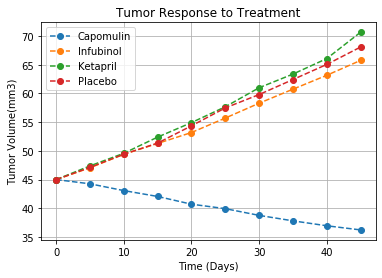

In [11]:
# Generate the Plot (with Error Bars)
plot_four_drugs = pivot_table[["Timepoint", "Capomulin", "Infubinol", "Ketapril", "Placebo"]]
timepoints = np.arange(10,5)
plt.errorbar(x=plot_four_drugs["Timepoint"],y=plot_four_drugs["Capomulin"], yerr=None, linestyle="--", fmt='o',label='Capomulin')
plt.errorbar(x=plot_four_drugs['Timepoint'],y=plot_four_drugs['Infubinol'], yerr=None, linestyle="--", fmt='o',label='Infubinol')
plt.errorbar(x=plot_four_drugs['Timepoint'],y=plot_four_drugs['Ketapril'], yerr=None, linestyle="--",fmt='o', label = 'Ketapril')
plt.errorbar(x=plot_four_drugs['Timepoint'],y=plot_four_drugs['Placebo'], yerr=None, linestyle="--", fmt='o', label = 'Placebo')
plt.ylabel('Tumor Volume(mm3)')
plt.xlabel('Time (Days)')
plt.title('Tumor Response to Treatment')
plt.grid()
plt.legend()
# Save the Figure
plt.savefig("Tumor Response to Treatment.png")
# Show the Figure
plt.show()



![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [12]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met_mean = mouse_clinical_df.groupby(['Drug', 'Timepoint']).mean()
mean_met_mean.reset_index(level = None, inplace = True)
mean_met_mean.drop(['Tumor Volume (mm3)'], axis=1,inplace=True)

# Convert to DataFrame

# Preview DataFrame
mean_met_mean.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [13]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
mean_met_sem = mouse_clinical_df.groupby(['Drug', 'Timepoint']).sem()
#mean_met_sem.reset_index(level = None, inplace = True)
mean_met_sem.drop(['Tumor Volume (mm3)','Mouse ID'], axis=1,inplace=True)
# Convert to DataFrame

# Preview DataFrame
mean_met_sem.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [14]:
# Minor Data Munging to Re-Format the Data Frames
pivot_table_met = mean_met_mean.pivot(index ="Timepoint", columns = 'Drug', values = "Metastatic Sites")
pivot_table_met.reset_index(level = None, inplace = True)
# Preview that Reformatting worked
pivot_table_met.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
2,10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
3,15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
4,20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [74]:
pivot_table_met.columns

Index(['Timepoint', 'Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril',
       'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug')

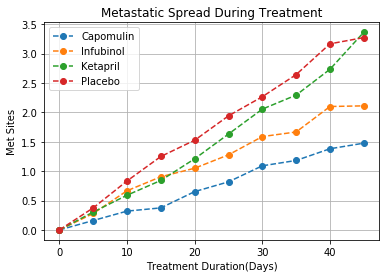

In [15]:
# Generate the Plot (with Error Bars)
plot_four_drugs = pivot_table_met[["Timepoint", "Capomulin", "Infubinol", "Ketapril", "Placebo"]]
timepoints = np.arange(10,5)
plt.errorbar(x=plot_four_drugs["Timepoint"],y=plot_four_drugs["Capomulin"], yerr=None, linestyle="--", fmt='o',label='Capomulin')
plt.errorbar(x=plot_four_drugs['Timepoint'],y=plot_four_drugs['Infubinol'], yerr=None, linestyle="--", fmt='o',label='Infubinol')
plt.errorbar(x=plot_four_drugs['Timepoint'],y=plot_four_drugs['Ketapril'], yerr=None, linestyle="--",fmt='o', label = 'Ketapril')
plt.errorbar(x=plot_four_drugs['Timepoint'],y=plot_four_drugs['Placebo'], yerr=None, linestyle="--", fmt='o', label = 'Placebo')
plt.ylabel('Met Sites')
plt.xlabel('Treatment Duration(Days)')
plt.title('Metastatic Spread During Treatment')
plt.grid()
plt.legend()   
# Save the Figure
plt.savefig("Metastatic Spread.png")
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [16]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
micecount=mouse_clinical_df.groupby(["Drug","Timepoint"]).count()
micecount.drop(['Tumor Volume (mm3)','Metastatic Sites'], axis=1,inplace=True)
micecount.reset_index(level = None, inplace = True)
# Convert to DataFrame

# Preview DataFrame
micecount.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [17]:
# Minor Data Munging to Re-Format the Data Frames
pivot_mice = micecount.pivot(index ='Timepoint', columns = 'Drug', values = 'Mouse ID')
pivot_mice.reset_index(level = None, inplace = True)
# Preview that Reformatting worked
pivot_mice.head()
# Preview the Data Frame


Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,25,25,25,25,25,25,26,25,26,25
1,5,25,21,25,23,23,24,25,25,25,24
2,10,25,20,21,22,21,24,23,24,23,22
3,15,24,19,21,19,21,20,17,24,23,21
4,20,23,18,20,19,20,19,17,23,21,17


In [18]:
micecount.columns

Index(['Drug', 'Timepoint', 'Mouse ID'], dtype='object')

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


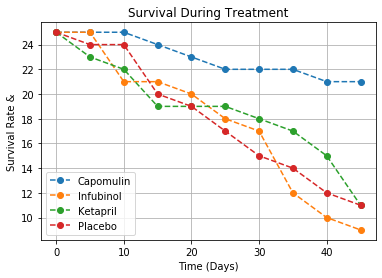

In [33]:
# Generate the Plot (Accounting for percentages)
plot_four_drugs = pivot_mice[["Timepoint", "Capomulin", "Infubinol", "Ketapril", "Placebo"]]
timepoints = np.arange(10,5)
plt.errorbar(x=pivot_mice["Timepoint"],y=pivot_mice["Capomulin"], yerr=None, linestyle="--", fmt='o',label='Capomulin')
plt.errorbar(x=pivot_mice['Timepoint'],y=pivot_mice['Infubinol'], yerr=None, linestyle="--", fmt='o',label='Infubinol')
plt.errorbar(x=pivot_mice['Timepoint'],y=pivot_mice['Ketapril'], yerr=None, linestyle="--",fmt='o', label = 'Ketapril')
plt.errorbar(x=pivot_mice['Timepoint'],y=pivot_mice['Placebo'], yerr=None, linestyle="--", fmt='o', label = 'Placebo')
plt.ylabel('Survival Rate &')
plt.xlabel('Time (Days)')
plt.title('Survival During Treatment')
plt.grid()
plt.legend()   
# Save the Figure
plt.savefig("Survival During Treatment.png")
# Show the Figure
plt.show()


![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [20]:
# Calculate the percent changes for each drug
percent_change = mouse_clinical_df.groupby(["Drug","Timepoint"]).count()
percent_change.drop(["Mouse ID","Metastatic Sites"], axis=1, inplace=True)
percent_change.reset_index(level = None, inplace = True)
percent_change.head()



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [21]:

pivot_table

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
5,25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
6,30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
7,35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
8,40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692
9,45,36.236114,64.132421,65.755562,70.662958,69.265506,68.084082,66.258529,34.955595,68.438310,65.960888


In [23]:
capomulin_percent=(pivot_table["Capomulin"].iloc[9]-pivot_table["Capomulin"].iloc[0])/pivot_table["Capomulin"].iloc[0]*100
ceftamin_percent=(pivot_table["Ceftamin"].iloc[9]-pivot_table["Ceftamin"].iloc[0])/pivot_table["Ceftamin"].iloc[0]*100
infunibol_percent=(pivot_table["Infubinol"].iloc[9]-pivot_table["Infubinol"].iloc[0])/pivot_table["Infubinol"].iloc[0]*100
ketapril_percent=(pivot_table["Ketapril"].iloc[9]-pivot_table["Ketapril"].iloc[0])/pivot_table["Ketapril"].iloc[0]*100
naftisol_percent=(pivot_table["Naftisol"].iloc[9]-pivot_table["Naftisol"].iloc[0])/pivot_table["Naftisol"].iloc[0]*100
placebo_percent=(pivot_table["Placebo"].iloc[9]-pivot_table["Placebo"].iloc[0])/pivot_table["Placebo"].iloc[0]*100
propriva_percent=(pivot_table["Propriva"].iloc[9]-pivot_table["Propriva"].iloc[0])/pivot_table["Propriva"].iloc[0]*100
ramicane_percent=(pivot_table["Ramicane"].iloc[9]-pivot_table["Ramicane"].iloc[0])/pivot_table["Ramicane"].iloc[0]*100
stelasyn_percent=(pivot_table["Stelasyn"].iloc[9]-pivot_table["Stelasyn"].iloc[0])/pivot_table["Stelasyn"].iloc[0]*100
zoniferol_percent=(pivot_table["Zoniferol"].iloc[9]-pivot_table["Zoniferol"].iloc[0])/pivot_table["Zoniferol"].iloc[0]*100

#capomulin_percent
#ceftamin_percent
#infunibol_percent
#ketapril_percent
#aftisol_percent
#placebo_percent
#propriva_percent
#ramicane_percent
#stelasyn_percent
#zoniferol_percent
drug_list = "Capomuli","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"
percent_list = (capomulin_percent,ceftamin_percent,infunibol_percent,ketapril_percent,naftisol_percent,placebo_percent,propriva_percent
        ,ramicane_percent,stelasyn_percent,zoniferol_percent)

percent_frame = pd.DataFrame({"Drug": drug_list, "Tumor Percent Change": percent_list})
percent_frame



,Drug,Tumor Percent Change
0,Capomuli,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [25]:
# Store all Relevant Percent Changes into a Tuple
percent_tuple = {'Capomulin': capomulin_percent,'Ketapril':ketapril_percent,'Naftisol': naftisol_percent, 'Stelasyn': stelasyn_percent}
percent_tuple_pd = pd.Series(percent_tuple)

drug_list2 = "Capomuli","Ketapril","Naftisol","Stelasyn"
percent_list2 = (capomulin_percent,ketapril_percent,naftisol_percent,stelasyn_percent)

percent_frame = pd.DataFrame({"Drug": drug_list2, "Tumor Percent Change": percent_list2})
percent_frame


,Drug,Tumor Percent Change
0,Capomuli,-19.475303
1,Ketapril,57.028795
2,Naftisol,53.923347
3,Stelasyn,52.085134


<function matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)>

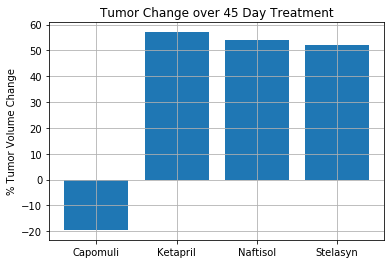

In [75]:
# Splice the data between passing and failing drugs

plt.bar(percent_frame["Drug"], percent_frame["Tumor Percent Change"])


# Orient widths. Add labels, tick marks, etc. 
plt.ylabel("% Tumor Volume Change")
plt.title("Tumor Change over 45 Day Treatment")
plt.grid()

# Use functions to label the percentages of changes

# Call functions to implement the function calls


# Save the Figure
plt.savefig("Tumor Change-Bar Chart.png")

# Show the Figure
plt.bar


![Metastatic Spread During Treatment](../Images/change.png)